In [472]:
import pandas as pd
import csv
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

window_time = 700
n_data = 20      # number of data 
n_texture = 2   # number of texture
n_surface = 1   # number of surface for each texture
n_mode = 3 
n_pressure = 4

header = [['Time','Strain_f'],
          ['Time','Strain_b']]
list_texture = ['P40_a','P40_b','P40_c','P60_a','P60_b','P60_c','P80_a','P80_b','P80_c']
# list_texture = ['P40_a','P40_b','P40_c']
list_pressure = [20,30,40,50]
modes = ['forward', 'reverse', 'straight']
folder = ['test_data_04_20']



### Import strain data:

#### Import Original Strain Data

In [473]:
strain_data_forward = pd.DataFrame()
strain_data_backward = pd.DataFrame()
os.chdir("C:\\Users\\nhnha\\OneDrive\\Desktop\\Whisker paper\\Learning_based_research\\strain_data\\"+folder[0]+"\\"+"original")

raw_data_forward = {}
raw_data_backward = {}
for filename in list_texture:
    for i in range(int(n_data/2)):    # number of data for 1 single texture in forward sweeping direction
        raw_csv_forward = pd.read_csv(filename+'0000_I0'+f"{i*2:03}"+'.CSV',skiprows = 14,
                                        header=None, names=header[0])
                                    
        new_header_f = "init_" + ''.join(filename.split("_"))+"_"+str(2*i)
        raw_csv_forward.rename(columns={'Strain_f': new_header_f}, inplace=True)
        calib_forward = raw_csv_forward[new_header_f][0]

        raw_csv_backward = pd.read_csv(filename+'0000_I0'+f"{i*2+1:03}"+'.CSV',skiprows = 14,
                                                header=None, names=header[1])
        new_header_b = "init_" + ''.join(filename.split("_"))+"_"+str(2*i+1)                                       
        raw_csv_backward.rename(columns={'Strain_b': new_header_b}, inplace=True)                                       
        calib_backward = raw_csv_backward[new_header_b][0]
        temp_forward = []
        temp_backward = []
        for j in range(700):
            temp_backward.append((raw_csv_backward.iloc[250+j])[new_header_b] - calib_backward)
            temp_forward.append((raw_csv_forward.iloc[250+j])[new_header_f] - calib_forward)
        raw_data_forward[new_header_f] = temp_forward
        raw_data_backward[new_header_b] = temp_backward
            
strain_data_forward = pd.DataFrame(raw_data_forward)
strain_data_backward = pd.DataFrame(raw_data_backward)



In [ ]:
strain_data_backward


#### Import Pressurized Strain Data

In [474]:
raw_data_forward = {}
raw_data_backward = {}
for mode in modes:
    for pressure in list_pressure:
        os.chdir("C:\\Users\\nhnha\\OneDrive\\Desktop\\Whisker paper\\Learning_based_research\\strain_data\\"+folder[0]+"\\"+mode+"\\P = "+str(pressure))
        for filename in list_texture:
            for i in range(int(n_data/2)):    # number of data for 1 single texture in forward sweeping direction
                raw_csv_forward = pd.read_csv(filename+'0000_I0'+f"{i*2:03}"+'.CSV',skiprows = 14,
                                                header=None, names=header[0])
                new_header_f = mode +"_"+str(pressure) + "kpa_" + ''.join(filename.split("_"))+"_"+str(2*i)
                raw_csv_forward.rename(columns={'Strain_f': new_header_f}, inplace=True)                                
                calib_forward = raw_csv_forward[new_header_f][0]
                temp_forward = []
                for j in range(700):
                    temp_forward.append((raw_csv_forward.iloc[250+j])[new_header_f] - calib_forward)
                raw_data_forward[new_header_f] = temp_forward
        
        for filename in list_texture:
            for i in range(int(n_data/2)):    # number of data for 1 single texture in forward sweeping direction
                raw_csv_backward = pd.read_csv(filename+'0000_I0'+f"{i*2+1:03}"+'.CSV',skiprows = 14,
                                                header=None, names=header[1])
                new_header_b = mode +"_"+str(pressure) + "kpa_" + ''.join(filename.split("_"))+"_"+str(2*i+1)
                raw_csv_backward.rename(columns={'Strain_b': new_header_b}, inplace=True)                                
                calib_backward = raw_csv_backward[new_header_b][0]
                temp_backward = []
                for j in range(700):
                    temp_backward.append((raw_csv_backward.iloc[250+j])[new_header_b] - calib_backward)
                raw_data_backward[new_header_b] = temp_backward
                
df_forward = pd.DataFrame(raw_data_forward)
df_backward = pd.DataFrame(raw_data_backward)
strain_data_forward = strain_data_forward.join(df_forward)
strain_data_backward = strain_data_backward.join(df_backward)


In [ ]:
strain_data_backward

#### Construct Strain DataFrame

In [475]:

strain_data = {}
strain_data['odd'] = strain_data_backward
strain_data['even'] = strain_data_forward
strain_data['odd']

,init_P40a_1,init_P40a_3,init_P40a_5,init_P40a_7,init_P40a_9,init_P40a_11,init_P40a_13,init_P40a_15,init_P40a_17,init_P40a_19,...,straight_50kpa_P80c_1,straight_50kpa_P80c_3,straight_50kpa_P80c_5,straight_50kpa_P80c_7,straight_50kpa_P80c_9,straight_50kpa_P80c_11,straight_50kpa_P80c_13,straight_50kpa_P80c_15,straight_50kpa_P80c_17,straight_50kpa_P80c_19
0,115.448571,117.480000,108.080000,121.158571,105.248571,108.448571,101.974286,104.875714,104.038571,118.927143,...,180.711429,182.277143,177.420000,181.857143,185.522857,180.844286,180.258571,183.925714,181.041429,187.234286
1,119.442857,113.890000,109.218571,127.078571,115.088571,103.112857,89.950000,104.230000,98.987143,113.075714,...,177.630000,181.738571,177.330000,180.968571,183.490000,183.201429,183.931429,180.361429,185.711429,186.430000
2,117.781429,114.575714,99.568571,116.352857,104.204286,99.351429,104.532857,103.277143,102.367143,105.314286,...,177.252857,185.028571,181.231429,178.657143,179.045714,181.890000,186.555714,183.008571,187.981429,184.015714
3,124.677143,112.487143,112.700000,121.577143,110.768571,94.698571,102.762857,113.494286,100.698571,104.671429,...,180.110000,187.017143,181.804286,181.134286,180.327143,180.785714,183.064286,185.190000,186.494286,186.061429
4,118.102857,100.661429,111.821429,112.421429,112.985714,108.837143,99.054286,106.522857,108.385714,96.654286,...,182.602857,184.431429,179.588571,184.935714,183.595714,184.181429,179.160000,181.232857,185.271429,188.832857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,113.544286,106.190000,113.278571,114.387143,117.018571,101.658571,101.594286,113.442857,105.895714,104.254286,...,178.242857,175.954286,177.338571,179.870000,173.947143,181.211429,176.332857,177.414286,175.135714,190.890000
696,111.778571,101.721429,107.855714,108.552857,111.481429,108.645714,108.388571,107.358571,106.985714,105.017143,...,180.164286,177.115714,181.591429,176.820000,174.550000,179.024286,171.791429,178.660000,168.087143,187.640000
697,107.864286,106.668571,113.842857,113.734286,110.704286,102.867143,102.650000,113.354286,101.785714,110.104286,...,179.888571,176.204286,179.268571,176.887143,181.358571,177.897143,174.072857,177.878571,174.350000,186.581429
698,114.084286,100.177143,114.068571,107.244286,116.227143,110.360000,107.611429,112.605714,110.645714,105.105714,...,178.887143,174.307143,177.545714,177.802857,181.585714,177.294286,179.631429,173.934286,182.097143,187.745714


#### PCA Processing

C:\Users\nhnha\AppData\Local\Temp\ipykernel_17436\1882223470.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot.show()
C:\Users\nhnha\AppData\Local\Temp\ipykernel_17436\1882223470.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot.show()


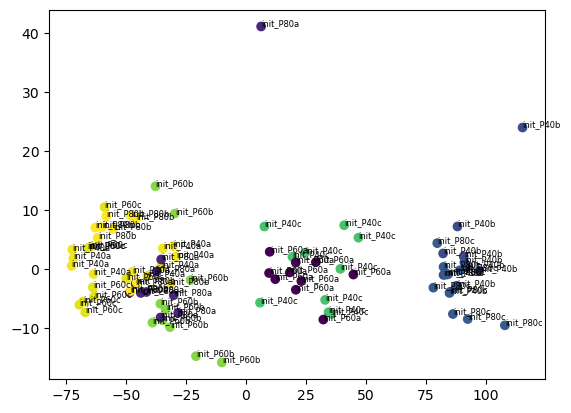

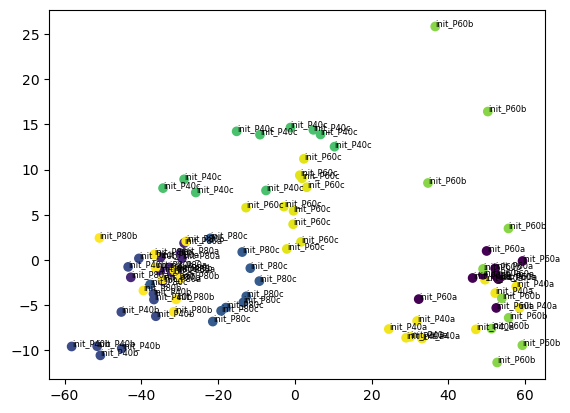

In [528]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

lower = 20
upper = 50
FEATURES_RANGE = range(lower,upper)
state = 'init'
os.chdir("C:\\Users\\nhnha\\OneDrive\\Desktop\\Whisker paper\\Learning_based_research\\data_processing\\pre-processing\\")
X = []
labels = []
label_map = {}
for type_file in ['odd','even']:
    label_map = dict([
        (v, i) for i, v in enumerate(
            list(set("_".join(e.split("_")[:-1]) for e in strain_data[type_file])) # remove the last component in file name (*_00, *_01, ...)
        )])
    
    X = [strain_data[type_file][header][FEATURES_RANGE] for header in strain_data[type_file] if state in header]
    # labels = [header.join(e.split("_")[:-1]) for header in strain_data[type_file] if state in header]
    labels = ["_".join(header.split("_")[:-1]) for header in strain_data[type_file] if state in header]

    
    reduce_processor = PCA(n_components=2)
    pipe = Pipeline([('pca', reduce_processor)])
    X_reduced = pipe.fit_transform(X)

    plot, ax = plt.subplots()
    figure = ax.scatter(X_reduced[:,0], X_reduced[:,1], 
            # alpha=hue,
            c=[label_map["_".join(e.split("_")[:])] for e in labels]
            )

    for i, txt in enumerate(labels):
        ax.text(X_reduced[i,0]+.04, X_reduced[i,1]+.04, txt, fontsize=6)
    plot.show()

    plot.savefig(f'{str(reduce_processor)[:3]}_{state}{lower}-{upper}_{type_file}.pdf')

In [529]:
X


[20   -88.528571
 21   -93.984286
 22   -86.107143
 23   -93.088571
 24   -88.504286
 25   -86.807143
 26   -93.984286
 27   -87.557143
 28   -93.150000
 29   -89.528571
 30   -88.550000
 31   -95.790000
 32   -87.607143
 33   -90.077143
 34   -89.531429
 35   -91.644286
 36   -95.370000
 37   -85.518571
 38   -93.014286
 39   -90.502857
 40   -87.507143
 41   -93.471429
 42   -87.351429
 43   -93.141429
 44   -90.927143
 45   -90.431429
 46   -95.740000
 47   -89.187143
 48   -96.064286
 49   -92.650000
 Name: init_P40a_0, dtype: float64,
 20   -89.061429
 21   -94.684286
 22   -86.541429
 23   -91.494286
 24   -89.898571
 25   -88.835714
 26   -95.230000
 27   -87.352857
 28   -90.867143
 29   -90.960000
 30   -90.221429
 31   -95.680000
 32   -87.150000
 33   -91.880000
 34   -92.141429
 35   -90.070000
 36   -94.885714
 37   -87.590000
 38   -92.912857
 39   -89.495714
 40   -87.788571
 41   -97.071429
 42   -89.672857
 43   -93.317143
 44   -91.811429
 45   -90.695714
 46   -96.26

In [ ]:
labels = ["_".join(header.split("_")[:-1]) for header in strain_data[type_file] if state in header]
# labels = strain_data[type_file].split("_")[:-1]
label_map

In [526]:
os.chdir("C:\\Users\\nhnha\\OneDrive\\Desktop\\Whisker paper\\Learning_based_research\\data_processing\\pre-processing\\")

lower = 20
upper = 50
FEATURES_RANGE = range(lower,upper)
state = 'init'
label_map = {}
for type_file in ['odd','even']:
    label_map = dict([
        (v, i) for i, v in enumerate(
            list(set("_".join(e.split("_")[:-1]) for e in strain_data[type_file])) # remove the last component in file name (*_00, *_01, ...)
        )])
    
    X = [strain_data[type_file][header][FEATURES_RANGE] for header in strain_data[type_file] if state in header and pressure in header ]
    # labels = [header for header in strain_data[type_file] if state in header and pressure in header]
    labels = ["_".join(header.split("_")[:-1]) for header in strain_data[type_file] if state in header]

    reduce_processor = PCA(n_components=2)
    pipe = Pipeline([('pca', reduce_processor)])
    X_reduced = pipe.fit_transform(X)

    plot, ax = plt.subplots()
    figure = ax.scatter(X_reduced[:,0], X_reduced[:,1], 
            # alpha=hue,
            c=[label_map["_".join(e.split("_")[:-1])] for e in labels]
            )

    for i, txt in enumerate(labels):
        ax.text(X_reduced[i,0]+.04, X_reduced[i,1]+.04, txt, fontsize=6)
    plot.show()

    plot.savefig(f'{str(reduce_processor)[:3]}_{state}{lower}-{upper}_{type_file}.pdf')

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

KeyError: 'straight_30kpa_P40a_0'

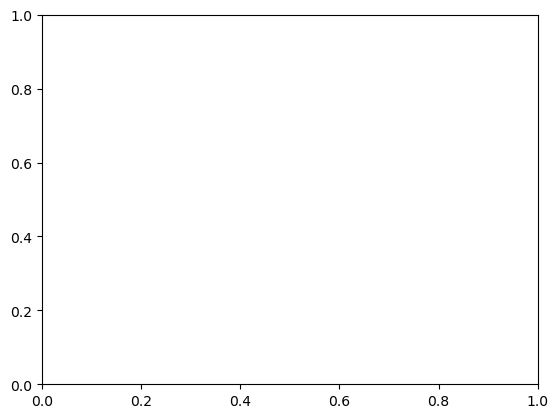

In [540]:
### Look up range
lower = 20
upper = 50
FEATURES_RANGE = range(lower,upper)
pressure = '30kpa'

state = 'straight'
os.chdir("C:\\Users\\nhnha\\OneDrive\\Desktop\\Whisker paper\\Learning_based_research\\data_processing\\pre-processing\\")
X = []
labels = []
label_map = {}
for type_file in ['even','odd']:
    
    X += [strain_data[type_file][header][FEATURES_RANGE] for header in strain_data[type_file] if state in header and pressure in header ]
    # labels += [header for header in strain_data[type_file] if state in header and pressure in header]
    labels += ["_".join(header.split("_")[:-1]) for header in strain_data[type_file] if state in header]
    label_map.update(dict([(v, i) for i, v in enumerate(list(set("_".join(e.split("_")[:-1]) for e in strain_data[type_file])))]))

# reduce_processor = PCA(n_components=2)
# pipe = Pipeline([('pca', reduce_processor)])
# X_reduced = pipe.fit_transform(X)

# plot, ax = plt.subplots()
# figure = ax.scatter(X_reduced[:,0], X_reduced[:,1], 
#         # alpha=hue,
#         c=[label_map["_".join(e.split("_")[:])] for e in labels]
#         )

# for i, txt in enumerate(labels):
#     ax.text(X_reduced[i,0]+.04, X_reduced[i,1]+.04, txt, fontsize=6)

# plot.show()

# plot.savefig(f'{str(reduce_processor)[:3]}_{state}{lower}-{upper}_{pressure}_{type_file}.pdf')


In [541]:
label_map

{'straight_40kpa_P60b': 0,
 'reverse_20kpa_P60b': 1,
 'straight_30kpa_P80a': 2,
 'forward_50kpa_P80a': 3,
 'forward_50kpa_P40a': 4,
 'straight_50kpa_P80a': 5,
 'straight_50kpa_P40b': 6,
 'forward_30kpa_P60b': 7,
 'reverse_50kpa_P40c': 8,
 'reverse_20kpa_P80c': 9,
 'straight_30kpa_P60c': 10,
 'straight_50kpa_P40c': 11,
 'forward_40kpa_P40c': 12,
 'straight_40kpa_P40a': 13,
 'init_P60a': 14,
 'straight_40kpa_P80b': 15,
 'forward_20kpa_P60b': 16,
 'reverse_20kpa_P80b': 17,
 'forward_40kpa_P60c': 18,
 'forward_30kpa_P80a': 19,
 'forward_20kpa_P40c': 20,
 'straight_40kpa_P60c': 21,
 'forward_20kpa_P80c': 22,
 'straight_20kpa_P40b': 23,
 'init_P80a': 24,
 'reverse_50kpa_P60c': 25,
 'reverse_20kpa_P40b': 26,
 'straight_20kpa_P60c': 27,
 'forward_40kpa_P40b': 28,
 'straight_40kpa_P60a': 29,
 'reverse_30kpa_P80a': 30,
 'reverse_50kpa_P60b': 31,
 'reverse_20kpa_P60a': 32,
 'forward_20kpa_P60a': 33,
 'forward_20kpa_P40a': 34,
 'init_P40b': 35,
 'reverse_20kpa_P40a': 36,
 'straight_50kpa_P80b': 37

In [ ]:
# Fast Fourier Transform (FFT)
def FFT(dataset, plot):
    global dominate_freq
    dt = 1/100     # tần số lấy mẫu = 100Hz
    t = np.arange(0,7,dt)
    n = len(t)
    lowpass_order_filltered = 1
    highpass_order_filltered = 0
    fhat = np.fft.fft(dataset,n)
    mag = np.abs(fhat)/n  # chia cho n =  normalization in the spectral domain 
    PSD = fhat * np.conj(fhat)/n
    L = np.arange(1,np.floor(n/2),dtype='int')
    freq = (1/(dt*n))*np.arange(n) 
    centroid = np.sum(freq[lowpass_order_filltered:(350-highpass_order_filltered)]
                      *mag[lowpass_order_filltered:(350-highpass_order_filltered)])/np.sum(mag[lowpass_order_filltered:(350-highpass_order_filltered)])
    sum_energy = np.sum(mag[lowpass_order_filltered:(len(L)-highpass_order_filltered)])
    weight_mean_amplitude = np.sum(freq[lowpass_order_filltered:(350-highpass_order_filltered)]
                      *mag[lowpass_order_filltered:(350-highpass_order_filltered)])/np.sum(freq[lowpass_order_filltered:(350-highpass_order_filltered)])
    
    max_mag = max(mag[lowpass_order_filltered:-1])   
    for i in range(lowpass_order_filltered, len(freq)): 
        if abs(mag[i] - max_mag) < 0.00000001:
            dominate_freq = freq[i]
            break
    if plot == True:
        fig, axs = plt.subplots(2,1,sharex=False, sharey=False)
        plt.close() 
        plt.rcParams['figure.figsize'] = [7,7]
        plt.rcParams.update({'font.size': 12})

        plt.sca(axs[0])
        plt.plot(t,dataset,linewidth=2, color='c', label='Time_Domain')
        plt.legend()
        plt.xlabel('Time (s)')
        plt.ylabel('Magnitude')

        plt.sca(axs[1])
        plt.plot(freq[L],mag[L],color='c', linewidth=2, label='Frequency_Domain')
        # plt.plot([centroid]*len(freq[lowpass_order_filltered:len(L)]),mag[lowpass_order_filltered:len(L)],color='r', linewidth=2)
#         plt.plot(freq[L],[energy]*len(L))
        # plt.text(centroid,0,'Spectral centroid = '+ str(centroid), va = 'top')
        # plt.text(25,max_mag/2,'Sum energy = '+ str(sum_energy), va = 'top')
        plt.text(dominate_freq,max_mag,'dominate frequency = '+ str(dominate_freq), va = 'top')
        plt.xlim(freq[L[0]],freq[L[-1]])
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude')
        plt.show()
    
    return dominate_freq, freq, mag, max_mag, centroid, sum_energy, fhat

def freq_filter(dataset, low_cut_freq, high_cut_freq,plot):
    dt = 1/100     # tần số lấy mẫu = 100Hz
    t = np.arange(0,7,dt)
    n = len(t)
    dominate_freq, freq, mag, max_mag, centroid, energy, fhat = FFT(dataset,plot = False)
    indices = np.logical_or(np.logical_and(freq>low_cut_freq, freq<high_cut_freq), 
                            np.logical_and(freq>100-high_cut_freq, freq<100-low_cut_freq))
    indices[0] = True
    L = np.arange(1,np.floor(n/2),dtype='int')
    clean_mag = mag*indices
    fhat = indices * fhat

    ffilt = (np.fft.ifft(fhat)).real
    if plot == True:
        fig, axs = plt.subplots(2,1,sharex=False, sharey=False)
        plt.sca(axs[0])
        plt.plot(t,ffilt,linewidth=2, color='c', label='Filtered')
        plt.plot(np.arange(0,7,dt),dataset, color='r', linewidth=2,label='Raw')
        plt.legend()
        plt.xlabel('Time (s)')
        plt.ylabel('Magnitude')
        
        plt.sca(axs[1])
        plt.plot(freq[L],clean_mag[L],color='c', linewidth=2, label = 'Filtered')
        plt.plot(freq[L],mag[L],color='r', linewidth=2, label = 'Raw')
        plt.xlim(freq[L[0]],freq[L[-1]])
        plt.legend()
        plt.xlabel('Frequency')
        plt.ylabel('Magnitude')
        
        fig.add_subplot(111, frameon = False)
        plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
        plt.title('Comparison data in time domain after filtering' )
    return ffilt, clean_mag

In [ ]:
from sklearn import preprocessing
sc_maxabs = preprocessing.MaxAbsScaler()
tempo_data =[]
header = ['Strain_f','Strain_b']
sc_maxabs.fit(strain_data[['Strain_f','Strain_b']])
strain_data_scaled = sc_maxabs.transform(strain_data[['Strain_f','Strain_b']])
strain_data_scaled = (pd.DataFrame(strain_data_scaled, columns=header)).assign(Time = total_time)

strain_data_scaled

### No normalization
k = 0
for filename in list_texture:
    for i in range(int(n_data/2)):
        strain_data[700*(10*k+i):700*(10*k+i+1)].to_csv(filename+'_'+f"{i * 2:02}"+'.csv',columns=['Strain_f'], index=0)
        strain_data[700*(10*k+i):700*(10*k+i+1)].to_csv(filename+'_'+f"{i * 2+1:02}"+'.csv',columns=['Strain_b'], index=0)
    k += 1

### With normalization
k = 0
for filename in list_texture:
    for i in range(int(n_data/2)):
        strain_data_scaled[700*(10*k+i):700*(10*k+i+1)].to_csv(filename+'_'+f"{i * 2:02}"+'_scaled.csv',columns=['Strain_f'], index=0)
        strain_data_scaled[700*(10*k+i):700*(10*k+i+1)].to_csv(filename+'_'+f"{i * 2+1:02}"+'_scaled.csv',columns=['Strain_b'], index=0)
    k += 1


In [ ]:
dominate_freq, freq, mag, max_mag, centroid, energy, fhat = FFT(strain_data_scaled[header[0]][0:700],plot = 1)
freq


In [ ]:
data = []

for m in header:
    tempo_data =[]
    for i in range(n_texture):
        for j in range(n_surface):
            for k in range(int(n_data/2)): 
                index = range(window_time*(int(n_data*n_surface*i/2)+int(n_data*j/2)+k),window_time*(int(n_data*n_surface*i/2)+int(n_data*j/2)+k+1))
                tempo_data.extend((freq_filter(strain_data_scaled[m][index],0.66666667,30, plot=0))[0])
    data  = data + [tempo_data]

processed_data = []
for i in range(len(data[0])):
    post_strain_data = []
    for j in range(len(header)):
        post_strain_data.append(data[j][i]) 
    processed_data.extend([post_strain_data])
processed_strain_data = (pd.DataFrame(processed_data, columns=header)).assign(Time = total_time)
processed_strain_data

In [ ]:
freq_filter(strain_data_scaled['Strain_f'][0:700],0.2,40, plot=1)

In [ ]:
t = np.arange(0,7,dt)
dataset = strain_data['Strain_f'][0:700]
dataset1 = strain_data['Strain_f'][2100:2800]


fig, axs = plt.subplots(2,1,sharex=False, sharey=False)
plt.close() 
plt.rcParams['figure.figsize'] = [7,7]
plt.rcParams.update({'font.size': 12})

plt.sca(axs[0])
plt.plot(t,dataset,linewidth=2, color='c', label='P40_origin')
plt.plot(t,dataset1,linewidth=2, color='r', label='P60_origin')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Magnitude')

dominate_freq, freq, mag, max_mag, centroid, energy, fhat = FFT(dataset,plot = False)
dominate_freq1, freq1, mag1, max_mag1, centroid1, energy1, fhat1 = FFT(dataset1,plot = False)
plt.sca(axs[1])
plt.plot(freq[L],mag[L],color='c', linewidth=2, label='Frequency_Domain')
# plt.text(dominate_freq,max_mag,'dominate frequency = '+ str(dominate_freq1), va = 'top')
plt.plot(freq1[L],mag1[L],color='r', linewidth=2, label='Frequency_Domain')
# plt.text(dominate_freq1,max_mag1,'dominate frequency = '+ str(dominate_freq1), va = 'top')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

fig.savefig('C:/Users/nhnha/OneDrive/Desktop/Whisker paper/Living-machine2023/data_processing/pre-processing/ss_respone_origin.pdf', bbox_inches='tight')

In [ ]:
t = np.arange(0,7,dt)
dataset = strain_data['Strain_f'][0:700]
dataset1 = strain_data['Strain_f'][14000:14700]
dataset2 = strain_data['Strain_f'][21000:21700]
dataset3 = strain_data['Strain_f'][28000:28700]



fig, axs = plt.subplots(2,1,sharex=False, sharey=False)
plt.close() 
plt.rcParams['figure.figsize'] = [7,7]
plt.rcParams.update({'font.size': 12})

plt.sca(axs[0])
plt.plot(t,dataset,linewidth=2, color='c', label='P40_forward_20')
plt.plot(t,dataset1,linewidth=2, color='r', label='P40_forward_20')
plt.plot(t,dataset2,linewidth=2, color='b', label='P40_forward_30')
plt.plot(t,dataset3,linewidth=2, color='g', label='P40_forward_40')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Magnitude')

dominate_freq, freq, mag, max_mag, centroid, energy, fhat = FFT(dataset,plot = False)
dominate_freq1, freq1, mag1, max_mag1, centroid1, energy1, fhat1 = FFT(dataset1,plot = False)
dominate_freq2, freq2, mag2, max_mag2, centroid2, energy2, fhat2 = FFT(dataset1,plot = False)
dominate_freq3, freq3, mag3, max_mag3, centroid3, energy3, fhat3 = FFT(dataset1,plot = False)
plt.sca(axs[1])
plt.plot(freq[L],mag[L],color='c', linewidth=2, label='Frequency_Domain')
plt.plot(freq1[L],mag1[L],color='r', linewidth=2, label='Frequency_Domain')
plt.plot(freq2[L],mag2[L],color='b', linewidth=2, label='Frequency_Domain')
plt.plot(freq2[L],mag2[L],color='g', linewidth=2, label='Frequency_Domain')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

fig.savefig('C:/Users/nhnha/OneDrive/Desktop/Whisker paper/Living-machine2023/data_processing/pre-processing/ss_respone_forward_20.pdf', bbox_inches='tight')

In [ ]:
t = np.arange(0,7,dt)
dataset = strain_data['Strain_b'][0:700]
dataset1 = strain_data['Strain_b'][14000:14700]
dataset2 = strain_data['Strain_b'][21000:21700]
dataset3 = strain_data['Strain_b'][28000:28700]



fig, axs = plt.subplots(2,1,sharex=False, sharey=False)
plt.close() 
plt.rcParams['figure.figsize'] = [7,7]
plt.rcParams.update({'font.size': 12})

plt.sca(axs[0])
plt.plot(t,dataset,linewidth=2, color='c', label='P40_backward_20')
plt.plot(t,dataset1,linewidth=2, color='r', label='P40_backward_20')
plt.plot(t,dataset2,linewidth=2, color='b', label='P40_backward_30')
plt.plot(t,dataset3,linewidth=2, color='g', label='P40_backward_40')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Magnitude')

dominate_freq, freq, mag, max_mag, centroid, energy, fhat = FFT(dataset,plot = False)
dominate_freq1, freq1, mag1, max_mag1, centroid1, energy1, fhat1 = FFT(dataset1,plot = False)
dominate_freq2, freq2, mag2, max_mag2, centroid2, energy2, fhat2 = FFT(dataset1,plot = False)
dominate_freq3, freq3, mag3, max_mag3, centroid3, energy3, fhat3 = FFT(dataset1,plot = False)
plt.sca(axs[1])
plt.plot(freq[L],mag[L],color='c', linewidth=2, label='Frequency_Domain')
plt.plot(freq1[L],mag1[L],color='r', linewidth=2, label='Frequency_Domain')
plt.plot(freq2[L],mag2[L],color='b', linewidth=2, label='Frequency_Domain')
plt.plot(freq2[L],mag2[L],color='g', linewidth=2, label='Frequency_Domain')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

fig.savefig('C:/Users/nhnha/OneDrive/Desktop/Whisker paper/Living-machine2023/data_processing/pre-processing/ss_respone_backward_20.pdf', bbox_inches='tight')